In [3]:
#Import relevant librairies

import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset 1 - Consumer Index

### Import dataset

In [2]:
df1 = pd.read_csv('Data-Visualization-and-Dashboards-with-Tableau/Raw_data/consumer_index.csv')

In [3]:
df1.shape

(5073, 5)

In [4]:
df1.head()

,date,region,measures,unit,index_value
0,1979-11,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
1,1979-12,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.4
2,1980-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3
3,1980-02,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.4
4,1980-03,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3


### Cleaning - Formatting Issues

Look for unique values for each row and inspect manually

In [8]:
df1['date'].unique()

array(['1979-11', '1979-12', '1980-01', '1980-02', '1980-03', '1980-04',
       '1980-05', '1980-06', '1980-07', '1980-08', '1980-09', '1980-10',
       '1980-11', '1980-12', '1981-01', '1981-02', '1981-03', '1981-04',
       '1981-05', '1981-06', '1981-07', '1981-08', '1981-09', '1981-10',
       '1981-11', '1981-12', '1982-01', '1982-02', '1982-03', '1982-04',
       '1982-05', '1982-06', '1982-07', '1982-08', '1982-09', '1982-10',
       '1982-11', '1982-12', '1983-01', '1983-02', '1983-03', '1983-04',
       '1983-05', '1983-06', '1983-07', '1983-08', '1983-09', '1983-10',
       '1983-11', '1983-12', '1984-01', '1984-02', '1984-03', '1984-04',
       '1984-05', '1984-06', '1984-07', '1984-08', '1984-09', '1984-10',
       '1984-11', '1984-12', '1985-01', '1985-02', '1985-03', '1985-04',
       '1985-05', '1985-06', '1985-07', '1985-08', '1985-09', '1985-10',
       '1985-11', '1985-12', '1986-01', '1986-02', '1986-03', '1986-04',
       '1986-05', '1986-06', '1986-07', '1986-08', 

In [9]:
df1['region'].unique()

array(['Canada'], dtype=object)

In [10]:
df1['measures'].unique()

array(['Consumer Price Index (CPI) inversely weighted by volatility and is adjusted to exclude the effect of changes in indirect taxes (CPIW) (year-over-year percent change)',
       'Consumer Price Index (CPI) excluding food, energy and the effect of indirect taxes',
       'Consumer Price Index (CPI) excluding the effect of indirect taxes',
       'Consumer Price Index (CPI) excluding the effect of indirect taxes, seasonally adjusted',
       'Consumer Price Index (CPI) excluding food, energy and the effect of indirect taxes, seasonally adjusted',
       'Consumer Price Index (CPI) excluding 8 of the most volatile components and indirect taxes (CPIX)',
       'Contribution of indirect taxes to monthly growth rate of the Consumer Price Index (CPI)',
       'Contribution of indirect taxes to monthly growth rate of the Consumer Price Index (CPI) excluding food and energy',
       'Contribution of indirect taxes to annual growth rate of the Consumer Price Index (CPI)',
       'Contributi

In [12]:
df1['unit'].unique()

array(['Percent', 'Index, 2002=100', 'Index, 1992=100', 'Index, 1986=100'],
      dtype=object)

In [15]:
df1['index_value'].unique()

array([ 9.300e+00,  9.400e+00,  9.100e+00,  9.500e+00,  9.700e+00,
        9.800e+00,  1.020e+01,  1.040e+01,  1.050e+01,  1.010e+01,
        1.030e+01,  9.900e+00,  1.000e+01,  9.200e+00,  9.000e+00,
        8.300e+00,  7.800e+00,  7.300e+00,  6.900e+00,  6.100e+00,
        5.500e+00,  5.200e+00,  4.900e+00,  4.700e+00,  4.200e+00,
        4.300e+00,  6.210e+01,  4.600e+00,  6.330e+01,  7.550e+01,
        7.340e+01,  7.570e+01,  7.360e+01,  9.090e+01,  9.200e+01,
        9.130e+01,  9.240e+01,  9.150e+01,  6.230e+01,  4.500e+00,
        6.360e+01,  7.590e+01,  7.600e+01,  7.370e+01,  9.250e+01,
        9.160e+01,  9.270e+01,  9.170e+01,  0.000e+00,  6.270e+01,
        4.400e+00,  6.370e+01,  7.400e+01,  7.390e+01,  9.180e+01,
        9.280e+01,  9.190e+01,  6.280e+01,  6.390e+01,  7.630e+01,
        7.420e+01,  7.620e+01,  7.410e+01,  9.210e+01,  9.300e+01,
        9.220e+01,  6.300e+01,  7.440e+01,  7.450e+01,  9.230e+01,
        9.310e+01,  9.260e+01,  6.310e+01,  4.100e+00,  6.430e

some nans over... likely null values.. will deal with them at that point

<AxesSubplot: xlabel='index_value', ylabel='Count'>

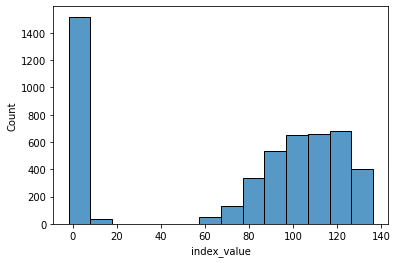

In [17]:
sns.histplot(df1['index_value'])

### Cleaning - Missing Values

Inspect null values and see if they should be assigned another value or if rows/columns should be dropped

In [7]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5073 entries, 0 to 5072
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5073 non-null   object 
 1   region       5073 non-null   object 
 2   measures     5073 non-null   object 
 3   unit         5073 non-null   object 
 4   index_value  5003 non-null   float64
dtypes: float64(1), object(4)
memory usage: 198.3+ KB


In [21]:
df1.loc[df1['index_value'].isnull()].head(70)

,date,region,measures,unit,index_value
441,1986-03,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",NaN
458,1986-04,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",NaN
475,1986-05,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",NaN
492,1986-06,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",NaN
509,1986-07,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",NaN
...,...,...,...,...,...
1546,1991-08,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",NaN
1563,1991-09,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",NaN
1580,1991-10,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",NaN
1597,1991-11,Canada,"Consumer Price Index (CPI) excluding food, ene...","Index, 2002=100",NaN


We'll drop those values

In [185]:
df1.dropna(subset=['index_value'], inplace=True)
df1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5003 entries, 0 to 5072
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   date         5003 non-null   object 
 1   region       5003 non-null   object 
 2   measures     5003 non-null   object 
 3   unit         5003 non-null   object 
 4   index_value  5003 non-null   float64
dtypes: float64(1), object(4)
memory usage: 234.5+ KB


### Cleaning - Duplicate Values

In [27]:
df1[df1.duplicated()]

,date,region,measures,unit,index_value


### Formatting JOIN columns

In [6]:
#Making a year column
df1['joinYear']=df1['date'].str[:4]

#Making a Month Column
df1['joinMonth']=df1['date'].str[-2:]

# Making a Province Column
## Canada = Canada, every other will be down to a province
## In that case the region values are all Canada so we'll keep them like that
df1['joinProvince']="Canada"

df1.head()

,date,region,measures,unit,index_value,joinYear,joinMonth,joinProvince
0,1979-11,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3,1979,11,Canada
1,1979-12,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.4,1979,12,Canada
2,1980-01,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3,1980,01,Canada
3,1980-02,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.4,1980,02,Canada
4,1980-03,Canada,Consumer Price Index (CPI) inversely weighted ...,Percent,9.3,1980,03,Canada


### Export Dataset

In [7]:
df1.to_csv('Data-Visualization-and-Dashboards-with-Tableau/clean_data/consumer_index.csv')

## Dataset 2 - Housing Price Index

### Import dataset

The original dataset provided was a duplicate from above. This one was given as a correction the next day.

In [29]:
df2 = pd.read_csv('Data-Visualization-and-Dashboards-with-Tableau/Raw_data/housing_price_index.csv')

In [24]:
df2.shape

(4, 470)

In [25]:
df2.head()

,New housing price indexes,Jan-81,Feb-81,Mar-81,Apr-81,May-81,Jun-81,Jul-81,Aug-81,Sep-81,...,Apr-19,May-19,Jun-19,Jul-19,Aug-19,Sep-19,Oct-19,Nov-19,Dec-19,Jan-20
0,Total (house and land),38.2,38.7,39.3,39.9,40.6,40.8,40.8,40.6,40.4,...,103.2,103.1,103,102.9,103,103.2,103.3,103.2,103.4,103.4
1,House only,36.1,36.5,37.3,38.1,38.9,39.1,39.2,39,39,...,102.6,102.5,102.4,102.2,102.3,102.6,102.7,102.5,102.8,102.6
2,Land only,40.6E,41.0E,41.1E,41.2E,41.5E,41.6E,41.6E,41.5E,40.9E,...,104.1E,104.2E,104.2E,104.1E,104.2E,104.2E,104.2E,104.3E,104.4E,104.8E
3,Index,201612=100,201612=100,201612=100,201612=100,201612=100,201612=100,201612=100,201612=100,201612=100,...,201612=100,201612=100,201612=100,201612=100,201612=100,201612=100,201612=100,201612=100,201612=100,201612=100


### Format dataset

In [34]:
# We'll flip the data above so the dates in the column all fall into a single column with one date per row and the first value of every rows becomes the new columns

newDF2 = pd.DataFrame()
newDF2['Date'] = df2.columns.tolist()
newDF2['HPI_House_Land'] = df2.iloc[0].tolist()
newDF2['HPI_House'] = df2.iloc[1].tolist()
newDF2['HPI_Land'] = df2.iloc[2].tolist()
newDF2['Index'] = df2.iloc[3].tolist()
#delete the first row of new_df2
newDF2 = newDF2.drop([0])
newDF2.head()

,Date,HPI_House_Land,HPI_House,HPI_Land,Index
1,Jan-81,38.2,36.1,40.6E,201612=100
2,Feb-81,38.7,36.5,41.0E,201612=100
3,Mar-81,39.3,37.3,41.1E,201612=100
4,Apr-81,39.9,38.1,41.2E,201612=100
5,May-81,40.6,38.9,41.5E,201612=100


In [37]:
newDF2['joinProvince']='Canada'
newDF2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 469 entries, 1 to 469
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Date            469 non-null    object
 1   HPI_House_Land  469 non-null    object
 2   HPI_House       469 non-null    object
 3   HPI_Land        469 non-null    object
 4   Index           469 non-null    object
 5   joinProvince    469 non-null    object
dtypes: object(6)
memory usage: 22.1+ KB


We can see there's no null values in our dataset and given that we've almost redone this dataset from scratch, we know the formatting is correct.

### Formatting JOIN columns

In [38]:
# Great! Now we need to split the date column into two columns, one for the month and one for the year
newDF2['joinMonth'] = newDF2['Date'].str.split('-').str[0]
newDF2['joinYear'] = newDF2['Date'].str.split('-').str[1]

# Now we need to convert the month column into a numeric value
newDF2['joinMonth'] = newDF2['joinMonth'].replace('Jan', '01')
newDF2['joinMonth'] = newDF2['joinMonth'].replace('Feb', '02')
newDF2['joinMonth'] = newDF2['joinMonth'].replace('Mar', '03')
newDF2['joinMonth'] = newDF2['joinMonth'].replace('Apr', '04')
newDF2['joinMonth'] = newDF2['joinMonth'].replace('May', '05')
newDF2['joinMonth'] = newDF2['joinMonth'].replace('Jun', '06')
newDF2['joinMonth'] = newDF2['joinMonth'].replace('Jul', '07')
newDF2['joinMonth'] = newDF2['joinMonth'].replace('Aug', '08')
newDF2['joinMonth'] = newDF2['joinMonth'].replace('Sep', '09')
newDF2['joinMonth'] = newDF2['joinMonth'].replace('Oct', '10')
newDF2['joinMonth'] = newDF2['joinMonth'].replace('Nov', '11')
newDF2['joinMonth'] = newDF2['joinMonth'].replace('Dec', '12')

# Now we need to convert the year column into a numeric value
newDF2['joinYear'] = newDF2['joinYear'].replace('81', '1981')
newDF2['joinYear'] = newDF2['joinYear'].replace('82', '1982')
newDF2['joinYear'] = newDF2['joinYear'].replace('83', '1983')
newDF2['joinYear'] = newDF2['joinYear'].replace('84', '1984')
newDF2['joinYear'] = newDF2['joinYear'].replace('85', '1985')
newDF2['joinYear'] = newDF2['joinYear'].replace('86', '1986')
newDF2['joinYear'] = newDF2['joinYear'].replace('87', '1987')
newDF2['joinYear'] = newDF2['joinYear'].replace('88', '1988')
newDF2['joinYear'] = newDF2['joinYear'].replace('89', '1989')
newDF2['joinYear'] = newDF2['joinYear'].replace('90', '1990')
newDF2['joinYear'] = newDF2['joinYear'].replace('91', '1991')
newDF2['joinYear'] = newDF2['joinYear'].replace('92', '1992')
newDF2['joinYear'] = newDF2['joinYear'].replace('93', '1993')
newDF2['joinYear'] = newDF2['joinYear'].replace('94', '1994')
newDF2['joinYear'] = newDF2['joinYear'].replace('95', '1995')
newDF2['joinYear'] = newDF2['joinYear'].replace('96', '1996')
newDF2['joinYear'] = newDF2['joinYear'].replace('97', '1997')
newDF2['joinYear'] = newDF2['joinYear'].replace('98', '1998')
newDF2['joinYear'] = newDF2['joinYear'].replace('99', '1999')
newDF2['joinYear'] = newDF2['joinYear'].replace('00', '2000')
newDF2['joinYear'] = newDF2['joinYear'].replace('01', '2001')
newDF2['joinYear'] = newDF2['joinYear'].replace('02', '2002')
newDF2['joinYear'] = newDF2['joinYear'].replace('03', '2003')
newDF2['joinYear'] = newDF2['joinYear'].replace('04', '2004')
newDF2['joinYear'] = newDF2['joinYear'].replace('05', '2005')
newDF2['joinYear'] = newDF2['joinYear'].replace('06', '2006')
newDF2['joinYear'] = newDF2['joinYear'].replace('07', '2007')
newDF2['joinYear'] = newDF2['joinYear'].replace('08', '2008')
newDF2['joinYear'] = newDF2['joinYear'].replace('09', '2009')
newDF2['joinYear'] = newDF2['joinYear'].replace('10', '2010')
newDF2['joinYear'] = newDF2['joinYear'].replace('11', '2011')
newDF2['joinYear'] = newDF2['joinYear'].replace('12', '2012')
newDF2['joinYear'] = newDF2['joinYear'].replace('13', '2013')
newDF2['joinYear'] = newDF2['joinYear'].replace('14', '2014')
newDF2['joinYear'] = newDF2['joinYear'].replace('15', '2015')
newDF2['joinYear'] = newDF2['joinYear'].replace('16', '2016')
newDF2['joinYear'] = newDF2['joinYear'].replace('17', '2017')
newDF2['joinYear'] = newDF2['joinYear'].replace('18', '2018')
newDF2['joinYear'] = newDF2['joinYear'].replace('19', '2019')
newDF2['joinYear'] = newDF2['joinYear'].replace('20', '2020')

In [39]:
newDF2.head()

,Date,HPI_House_Land,HPI_House,HPI_Land,Index,joinProvince,joinMonth,joinYear
1,Jan-81,38.2,36.1,40.6E,201612=100,Canada,01,1981
2,Feb-81,38.7,36.5,41.0E,201612=100,Canada,02,1981
3,Mar-81,39.3,37.3,41.1E,201612=100,Canada,03,1981
4,Apr-81,39.9,38.1,41.2E,201612=100,Canada,04,1981
5,May-81,40.6,38.9,41.5E,201612=100,Canada,05,1981


Now that's a pretty clean data set!

### Export to CSV

In [40]:
newDF2.to_csv('Data-Visualization-and-Dashboards-with-Tableau/Clean_data/housing_price_index.csv')

## Dataset 3

### Import dataset

In [13]:
df3 = pd.read_csv('Data-Visualization-and-Dashboards-with-Tableau/Raw_data/office_realestate_index.csv')

In [23]:
df3.shape

(30968, 5)

In [24]:
df3.head()

,date,region,property_type,baseline,index_value
0,1981-01,Seven census metropolitan area composite,Office,"Index, 2002=100",58.4
1,1981-01,Seven census metropolitan area composite,Warehouse,"Index, 2002=100",53.3
2,1981-01,Seven census metropolitan area composite,Shopping centre,"Index, 2002=100",59.3
3,1981-01,Seven census metropolitan area composite,Light factory,"Index, 2002=100",50.1
4,1981-01,Seven census metropolitan area composite,School,"Index, 2002=100",56.1


### Cleaning - Formatting Issues

Look for unique values for each row and inspect manually

In [25]:
df3['date'].unique()

array(['1981-01', '1981-04', '1981-07', '1981-10', '1982-01', '1982-04',
       '1982-07', '1982-10', '1983-01', '1983-04', '1983-07', '1983-10',
       '1984-01', '1984-04', '1984-07', '1984-10', '1985-01', '1985-04',
       '1985-07', '1985-10', '1986-01', '1986-04', '1986-07', '1986-10',
       '1987-01', '1987-04', '1987-07', '1987-10', '1988-01', '1988-04',
       '1988-07', '1988-10', '1989-01', '1989-04', '1989-07', '1989-10',
       '1990-01', '1990-04', '1990-07', '1990-10', '1991-01', '1991-04',
       '1991-07', '1991-10', '1992-01', '1992-04', '1992-07', '1992-10',
       '1993-01', '1993-04', '1993-07', '1993-10', '1994-01', '1994-04',
       '1994-07', '1994-10', '1995-01', '1995-04', '1995-07', '1995-10',
       '1996-01', '1996-04', '1996-07', '1996-10', '1997-01', '1997-04',
       '1997-07', '1997-10', '1998-01', '1998-04', '1998-07', '1998-10',
       '1999-01', '1999-04', '1999-07', '1999-10', '2000-01', '2000-04',
       '2000-07', '2000-10', '2001-01', '2001-04', 

In [26]:
df3['region'].unique()

array(['Seven census metropolitan area composite', 'Halifax, Nova Scotia',
       'Montréal, Quebec',
       'Ottawa-Gatineau, Ontario part, Ontario/Quebec',
       'Toronto, Ontario', 'Calgary, Alberta', 'Edmonton, Alberta',
       'Vancouver, British Columbia'], dtype=object)

<AxesSubplot: xlabel='region', ylabel='Count'>

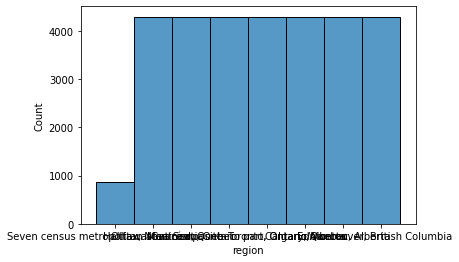

In [32]:
sns.histplot(df3['region'])

In [27]:
df3['property_type'].unique()

array(['Office', 'Warehouse', 'Shopping centre', 'Light factory',
       'School', 'Apartment'], dtype=object)

In [28]:
df3['baseline'].unique()

array(['Index, 2002=100'], dtype=object)

In [29]:
df3['index_value'].unique()

array([ 58.4,  53.3,  59.3, ..., 243.9, 213.2, 218.3])

<AxesSubplot: xlabel='index_value', ylabel='Count'>

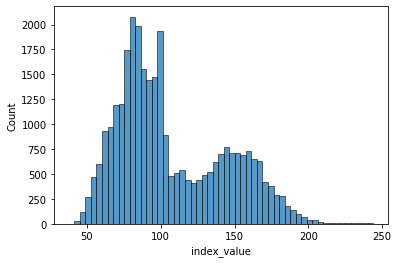

In [30]:
sns.histplot(df3['index_value'])

### Cleaning - Missing Values

Inspect null values and see if they should be assigned another value or if rows/columns should be dropped

In [33]:
df3.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30968 entries, 0 to 30967
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30968 non-null  object 
 1   region         30968 non-null  object 
 2   property_type  30968 non-null  object 
 3   baseline       30968 non-null  object 
 4   index_value    30968 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.2+ MB


No duplicate values

### Cleaning - Duplicate Values

In [34]:
df3[df3.duplicated()]

,date,region,property_type,baseline,index_value
114,1981-01,"Calgary, Alberta",Warehouse,"Index, 2002=100",67.0
123,1981-01,"Calgary, Alberta",Light factory,"Index, 2002=100",61.5
176,1981-01,"Vancouver, British Columbia",School,"Index, 2002=100",58.6
241,1981-04,"Ottawa-Gatineau, Ontario part, Ontario/Quebec",Warehouse,"Index, 2002=100",51.5
299,1981-04,"Calgary, Alberta",Shopping centre,"Index, 2002=100",70.4
...,...,...,...,...,...
28610,2015-04,"Halifax, Nova Scotia",Shopping centre,"Index, 2002=100",145.1
29049,2015-10,"Halifax, Nova Scotia",Light factory,"Index, 2002=100",170.2
29777,2016-07,"Toronto, Ontario",Warehouse,"Index, 2002=100",150.3
30535,2017-04,"Vancouver, British Columbia",Apartment,"Index, 2002=100",186.2


This dataset has some duplicates, let's confirm and remove them

In [14]:
df3.drop_duplicates(inplace=True)
df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30381 entries, 0 to 30967
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30381 non-null  object 
 1   region         30381 non-null  object 
 2   property_type  30381 non-null  object 
 3   baseline       30381 non-null  object 
 4   index_value    30381 non-null  float64
dtypes: float64(1), object(4)
memory usage: 1.4+ MB


### Formatting JOIN columns

In [16]:
#Making a year column
df3['joinYear']=df3['date'].str[:4]

#Making a Month Column
df3['joinMonth']=df3['date'].str[-2:]

# Making a Province Column
## Canada = Canada, every other will be down to a province
## In that case the region values are all Canada so we'll keep them like that
df3['joinProvince']=df3['region']

X='Seven census metropolitan area composite'
Y='Canada'
df3['joinProvince'].replace(X, Y, inplace=True)

X='Halifax, Nova Scotia'
Y='NS'
df3['joinProvince'].replace(X, Y, inplace=True)

X='Montréal, Quebec'
Y='QC'
df3['joinProvince'].replace(X, Y, inplace=True)

X='Ottawa-Gatineau, Ontario part, Ontario/Quebec'
Y='ON'
df3['joinProvince'].replace(X, Y, inplace=True)

X='Toronto, Ontario'
Y='ON'
df3['joinProvince'].replace(X, Y, inplace=True)

X='Calgary, Alberta'
Y='AB'
df3['joinProvince'].replace(X, Y, inplace=True)

X='Edmonton, Alberta'
Y='AB'
df3['joinProvince'].replace(X, Y, inplace=True)

X='Vancouver, British Columbia'
Y='BC'
df3['joinProvince'].replace(X, Y, inplace=True)

df3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 30381 entries, 0 to 30967
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           30381 non-null  object 
 1   region         30381 non-null  object 
 2   property_type  30381 non-null  object 
 3   baseline       30381 non-null  object 
 4   index_value    30381 non-null  float64
 5   joinYear       30381 non-null  object 
 6   joinMonth      30381 non-null  object 
 7   joinProvince   30381 non-null  object 
dtypes: float64(1), object(7)
memory usage: 2.1+ MB


### Export Dataset

In [17]:
df3.to_csv('Data-Visualization-and-Dashboards-with-Tableau/Clean_data/office_realestate_index.csv')

## Dataset 4 - Real Estate Numbers

### Import dataset

In [20]:
df4 = pd.read_csv('Data-Visualization-and-Dashboards-with-Tableau/Raw_data/real_estate_numbers.csv')

In [19]:
df4.shape

(12342, 16)

In [21]:
df4.head()

,REF_DATE,GEO,DGUID,Housing estimates,Type of unit,UOM,UOM_ID,SCALAR_FACTOR,SCALAR_ID,VECTOR,COORDINATE,VALUE,STATUS,SYMBOL,TERMINATED,DECIMALS
0,1955,Canada,2016A000011124,Housing starts,Total units,Units,300,units,0,v730579,1.1.1,138276,NaN,NaN,NaN,0
1,1955,Canada,2016A000011124,Housing starts,Single-detached,Units,300,units,0,v730524,1.1.2,99003,NaN,NaN,NaN,0
2,1955,Canada,2016A000011124,Housing starts,Multiples,Units,300,units,0,v730568,1.1.4,39273,NaN,NaN,NaN,0
3,1955,Canada,2016A000011124,Housing starts,Semi-detached,Units,300,units,0,v730535,1.1.3,10606,NaN,NaN,NaN,0
4,1955,Canada,2016A000011124,Housing starts,Row,Units,300,units,0,v730546,1.1.5,1909,NaN,NaN,NaN,0


### Cleaning - Formatting Issues

Look for unique values for each row and inspect manually

In [38]:
df4['REF_DATE'].unique()

array([1955, 1956, 1957, 1958, 1959, 1960, 1961, 1962, 1963, 1964, 1965,
       1966, 1967, 1968, 1969, 1970, 1971, 1972, 1973, 1974, 1975, 1976,
       1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987,
       1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998,
       1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009,
       2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019],
      dtype=int64)

Could be renamed to year?

In [22]:
df4.rename(columns={'REF_DATE': 'year'}, inplace=True)

In [39]:
df4['GEO'].unique()

array(['Canada', 'Newfoundland and Labrador', 'Prince Edward Island',
       'Nova Scotia', 'New Brunswick', 'Quebec', 'Ontario', 'Manitoba',
       'Saskatchewan', 'Alberta', 'British Columbia'], dtype=object)

In [40]:
df4['DGUID'].unique()

array(['2016A000011124', '2016A000210', '2016A000211', '2016A000212',
       '2016A000213', '2016A000224', '2016A000235', '2016A000246',
       '2016A000247', '2016A000248', '2016A000259'], dtype=object)

In [41]:
df4['Housing estimates'].unique()

array(['Housing starts', 'Housing completions',
       'Housing under construction'], dtype=object)

In [42]:
df4['Type of unit'].unique()

array(['Total units', 'Single-detached', 'Multiples', 'Semi-detached',
       'Row', 'Apartment and other unit types'], dtype=object)

In [43]:
df4['UOM'].unique()

array(['Units'], dtype=object)

All the same values.. redundant?

In [44]:
df4['UOM_ID'].unique()

array([300], dtype=int64)

All the same values.. redundant?

In [45]:
df4['SCALAR_FACTOR'].unique()

array(['units ', 'units'], dtype=object)

All the same values.. redundant? If not, correct the formatting issue

In [46]:
df4['SCALAR_ID'].unique()

array([0], dtype=int64)

All the same values.. redundant? If not, correct the formatting issue

In [47]:
df4['VECTOR'].unique()

array(['v730579', 'v730524', 'v730568', 'v730535', 'v730546', 'v730557',
       'v732453', 'v732398', 'v732442', 'v732409', 'v732420', 'v732431',
       'v730580', 'v730525', 'v730569', 'v730536', 'v730547', 'v730558',
       'v732454', 'v732399', 'v732443', 'v732410', 'v732421', 'v732432',
       'v730582', 'v730527', 'v730571', 'v730538', 'v730549', 'v730560',
       'v732456', 'v732401', 'v732445', 'v732412', 'v732423', 'v732434',
       'v730583', 'v730528', 'v730572', 'v730539', 'v730550', 'v730561',
       'v732457', 'v732402', 'v732446', 'v732413', 'v732424', 'v732435',
       'v730584', 'v730529', 'v730573', 'v730540', 'v730551', 'v730562',
       'v732458', 'v732403', 'v732447', 'v732414', 'v732425', 'v732436',
       'v730585', 'v730530', 'v730574', 'v730541', 'v730552', 'v730563',
       'v732459', 'v732404', 'v732448', 'v732415', 'v732426', 'v732437',
       'v730586', 'v730531', 'v730575', 'v730542', 'v730553', 'v730564',
       'v732460', 'v732405', 'v732449', 'v732416', 

Not sure what this field is, but formatting looks okay

In [49]:
df4['COORDINATE'].unique()

array(['1.1.1', '1.1.2', '1.1.4', '1.1.3', '1.1.5', '1.1.6', '1.3.1',
       '1.3.2', '1.3.4', '1.3.3', '1.3.5', '1.3.6', '2.1.1', '2.1.2',
       '2.1.4', '2.1.3', '2.1.5', '2.1.6', '2.3.1', '2.3.2', '2.3.4',
       '2.3.3', '2.3.5', '2.3.6', '3.1.1', '3.1.2', '3.1.4', '3.1.3',
       '3.1.5', '3.1.6', '3.3.1', '3.3.2', '3.3.4', '3.3.3', '3.3.5',
       '3.3.6', '4.1.1', '4.1.2', '4.1.4', '4.1.3', '4.1.5', '4.1.6',
       '4.3.1', '4.3.2', '4.3.4', '4.3.3', '4.3.5', '4.3.6', '5.1.1',
       '5.1.2', '5.1.4', '5.1.3', '5.1.5', '5.1.6', '5.3.1', '5.3.2',
       '5.3.4', '5.3.3', '5.3.5', '5.3.6', '6.1.1', '6.1.2', '6.1.4',
       '6.1.3', '6.1.5', '6.1.6', '6.3.1', '6.3.2', '6.3.4', '6.3.3',
       '6.3.5', '6.3.6', '7.1.1', '7.1.2', '7.1.4', '7.1.3', '7.1.5',
       '7.1.6', '7.3.1', '7.3.2', '7.3.4', '7.3.3', '7.3.5', '7.3.6',
       '8.1.1', '8.1.2', '8.1.4', '8.1.3', '8.1.5', '8.1.6', '8.3.1',
       '8.3.2', '8.3.4', '8.3.3', '8.3.5', '8.3.6', '9.1.1', '9.1.2',
       '9.1.4', '9.1

Not sure what this field is, but formatting looks okay

In [50]:
df4['VALUE'].unique()

array([138276,  99003,  39273, ...,   1038,   4159,  23966], dtype=int64)

In [51]:
df4['STATUS'].unique()

array([nan])

Useless field

In [52]:
df4['SYMBOL'].unique()

array([nan])

Useless field

In [53]:
df4['TERMINATED'].unique()

array([nan])

Useless field

In [54]:
df4['DECIMALS'].unique()

array([0], dtype=int64)

Useless field

In [6]:
#Dropping all redundant/useless fields
df4.drop(['UOM', 'UOM_ID', 'SCALAR_FACTOR', 'SCALAR_ID', 'STATUS', 'SYMBOL', 'TERMINATED', 'DECIMALS'], axis=1, inplace=True)

### Cleaning - Missing Values

Inspect null values and see if they should be assigned another value or if rows/columns should be dropped

In [22]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12342 entries, 0 to 12341
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   REF_DATE           12342 non-null  int64 
 1   GEO                12342 non-null  object
 2   DGUID              12342 non-null  object
 3   Housing estimates  12342 non-null  object
 4   Type of unit       12342 non-null  object
 5   VECTOR             12342 non-null  object
 6   COORDINATE         12342 non-null  object
 7   VALUE              12342 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 771.5+ KB


No null values in the fields we're interested to keep

### Cleaning - Duplicate Values

In [7]:
df4[df4.duplicated()]

,year,GEO,DGUID,Housing estimates,Type of unit,VECTOR,COORDINATE,VALUE


No duplicates

In [26]:
df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12342 entries, 0 to 12341
Data columns (total 8 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               12342 non-null  int64 
 1   GEO                12342 non-null  object
 2   DGUID              12342 non-null  object
 3   Housing estimates  12342 non-null  object
 4   Type of unit       12342 non-null  object
 5   VECTOR             12342 non-null  object
 6   COORDINATE         12342 non-null  object
 7   VALUE              12342 non-null  int64 
dtypes: int64(2), object(6)
memory usage: 771.5+ KB


### Formatting JOIN columns

In [8]:
#There's already a year column so we'll skip that one

# No Month data..


# Making a Province Column
## Canada = Canada, every other will be down to a province
## In that case the region values are all Canada so we'll keep them like that
df4['joinProvince']=df4['GEO']

X='Newfoundland and Labrador'
Y='NL'
df4['joinProvince'].replace(X, Y, inplace=True)

X='Prince Edward Island'
Y='PE'
df4['joinProvince'].replace(X, Y, inplace=True)

X='Nova Scotia'
Y='NS'
df4['joinProvince'].replace(X, Y, inplace=True)

X='New Brunswick'
Y='NB'
df4['joinProvince'].replace(X, Y, inplace=True)

X='Quebec'
Y='QC'
df4['joinProvince'].replace(X, Y, inplace=True)

X='Ontario'
Y='ON'
df4['joinProvince'].replace(X, Y, inplace=True)

X='Manitoba'
Y='MB'
df4['joinProvince'].replace(X, Y, inplace=True)

X='Saskatchewan'
Y='SK'
df4['joinProvince'].replace(X, Y, inplace=True)

X='Alberta'
Y='AB'
df4['joinProvince'].replace(X, Y, inplace=True)

X='British Columbia'
Y='BC'
df4['joinProvince'].replace(X, Y, inplace=True)

df4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12342 entries, 0 to 12341
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   year               12342 non-null  int64 
 1   GEO                12342 non-null  object
 2   DGUID              12342 non-null  object
 3   Housing estimates  12342 non-null  object
 4   Type of unit       12342 non-null  object
 5   VECTOR             12342 non-null  object
 6   COORDINATE         12342 non-null  object
 7   VALUE              12342 non-null  int64 
 8   joinProvince       12342 non-null  object
dtypes: int64(2), object(7)
memory usage: 867.9+ KB


### Export Dataset

In [9]:
df4.to_csv('Data-Visualization-and-Dashboards-with-Tableau/Clean_data/real_estate_numbers.csv')

## Dataset 5 - Real Estate Prices

### Import dataset

This dataset is an excel file with many sheets. Every sheet has the same structure, and the sheet name indicates the region this data relates to. We'll import the data as one df and add the name of each sheet as an additional column

In [60]:
!pip install openpyxl

     ------------------------------------ 242.1/242.1 kB 549.5 kB/s eta 0:00:00


In [10]:
def read_excel_sheets(file_path):
    xl = pd.ExcelFile(file_path)
    sheets = xl.sheet_names
    df = pd.DataFrame()
    for sheet in sheets:
        dftemp = pd.read_excel(file_path, sheet_name=sheet)
        dftemp['sheet'] = sheet
        df = pd.concat([df, dftemp])
    return df

In [31]:
df5 = read_excel_sheets('Data-Visualization-and-Dashboards-with-Tableau/Raw_data/real_estate_prices.xlsx')

In [32]:
df5.shape

(7938, 14)

In [66]:
df5.head()

,Date,Composite_HPI,Single_Family_HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Composite_Benchmark,Single_Family_Benchmark,One_Storey_Benchmark,Two_Storey_Benchmark,Townhouse_Benchmark,Apartment_Benchmark,sheet
0,2005-01-01,100.0,100.0,100.0,100.0,100.0,100.0,248200,267500,219800,307200,211800.0,190600.0,Aggregate
1,2005-02-01,101.0,101.0,101.0,101.1,100.6,100.9,250600,270200,222000,310600,213100.0,192300.0,Aggregate
2,2005-03-01,102.0,102.2,102.2,102.2,101.2,101.4,253100,273400,224600,313900,214300.0,193200.0,Aggregate
3,2005-04-01,102.9,103.2,103.3,103.2,101.9,102.1,255400,276100,227100,317000,215800.0,194600.0,Aggregate
4,2005-05-01,103.7,103.9,104.3,103.6,102.6,102.9,257300,277900,229300,318200,217300.0,196100.0,Aggregate


### Cleaning - Formatting Issues

Look for unique values for each row and inspect manually

In [67]:
df5['Date'].unique()

array(['2005-01-01T00:00:00.000000000', '2005-02-01T00:00:00.000000000',
       '2005-03-01T00:00:00.000000000', '2005-04-01T00:00:00.000000000',
       '2005-05-01T00:00:00.000000000', '2005-06-01T00:00:00.000000000',
       '2005-07-01T00:00:00.000000000', '2005-08-01T00:00:00.000000000',
       '2005-09-01T00:00:00.000000000', '2005-10-01T00:00:00.000000000',
       '2005-11-01T00:00:00.000000000', '2005-12-01T00:00:00.000000000',
       '2006-01-01T00:00:00.000000000', '2006-02-01T00:00:00.000000000',
       '2006-03-01T00:00:00.000000000', '2006-04-01T00:00:00.000000000',
       '2006-05-01T00:00:00.000000000', '2006-06-01T00:00:00.000000000',
       '2006-07-01T00:00:00.000000000', '2006-08-01T00:00:00.000000000',
       '2006-09-01T00:00:00.000000000', '2006-10-01T00:00:00.000000000',
       '2006-11-01T00:00:00.000000000', '2006-12-01T00:00:00.000000000',
       '2007-01-01T00:00:00.000000000', '2007-02-01T00:00:00.000000000',
       '2007-03-01T00:00:00.000000000', '2007-04-01

In [68]:
df5['Composite_HPI'].unique()

array([100. , 101. , 102. , ..., 198.2, 195.8, 189.2])

In [69]:
df5['Single_Family_HPI'].unique()

array([100. , 101. , 102.2, ..., 196.9, 196.8, 182.3])

In [70]:
df5['One_Storey_HPI'].unique()

array([100. , 101. , 102.2, ..., 181.3, 209.1, 213.7])

In [71]:
df5['Two_Storey_HPI'].unique()

array([100. , 101.1, 102.2, ..., 205.7, 204.1, 204.5])

In [72]:
df5['Townhouse_HPI'].unique()

array([100. , 100.6, 101.2, ..., 204.5, 202.4, 187.8])

In [73]:
df5['Apartment_HPI'].unique()

array([100. , 100.9, 101.4, ..., 205.8, 185.3, 175.4])

In [74]:
df5['Composite_Benchmark'].unique()

array([248200, 250600, 253100, ..., 261100, 256500, 268800], dtype=int64)

In [75]:
df5['Single_Family_Benchmark'].unique()

array([267500, 270200, 273400, ..., 281600, 279900, 265100], dtype=int64)

In [76]:
df5['One_Storey_Benchmark'].unique()

array([219800, 222000, 224600, ..., 275800, 267700, 260500], dtype=int64)

In [77]:
df5['Two_Storey_Benchmark'].unique()

array([307200, 310600, 313900, ..., 259000, 259300, 255400], dtype=int64)

In [78]:
df5['Townhouse_Benchmark'].unique()

array([211800., 213100., 214300., ..., 250900., 253700., 255500.])

In [79]:
df5['Apartment_Benchmark'].unique()

array([190600., 192300., 193200., ..., 247000., 256700., 259000.])

In [80]:
df5['sheet'].unique()

array(['Aggregate', 'Vancouver_Island', 'Victoria', 'Lower_Mainland',
       'Greater_Vancouver', 'Fraser_Valley', 'Okanagan_Valley', 'Calgary',
       'Edmonton', 'Regina', 'Saskatoon', 'Winnipeg', 'Bancroft_and_Area',
       'Barrie_and_District', 'Brantford_Region', 'Cambridge',
       'Grey_Bruce_Owen_Sound', 'Guelph_and_District',
       'Hamilton_Burlington', 'Huron_Perth', 'Kawartha_Lakes',
       'Kitchener_Waterloo', 'Lakelands', 'London_St_Thomas',
       'Mississauga', 'Niagara_Region', 'North_Bay',
       'Northumberland_Hills', 'Oakville_Milton', 'Ottawa',
       'Peterborough_and_Kawarthas', 'Quinte_and_District',
       'Simcoe_and_District', 'Southern_Georgian_Bay',
       'Tillsonburg_District', 'Greater_Toronto', 'Woodstock_Ingersoll',
       'Montreal_CMA', 'Quebec_CMA', 'Greater_Moncton',
       'Newfoundland_and_Labrador', 'St_Johns_NL'], dtype=object)

### Cleaning - Missing Values

Inspect null values and see if they should be assigned another value or if rows/columns should be dropped

In [81]:
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7938 entries, 0 to 188
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     7938 non-null   datetime64[ns]
 1   Composite_HPI            7938 non-null   float64       
 2   Single_Family_HPI        7938 non-null   float64       
 3   One_Storey_HPI           7938 non-null   float64       
 4   Two_Storey_HPI           7938 non-null   float64       
 5   Townhouse_HPI            6615 non-null   float64       
 6   Apartment_HPI            6237 non-null   float64       
 7   Composite_Benchmark      7938 non-null   int64         
 8   Single_Family_Benchmark  7938 non-null   int64         
 9   One_Storey_Benchmark     7938 non-null   int64         
 10  Two_Storey_Benchmark     7938 non-null   int64         
 11  Townhouse_Benchmark      6615 non-null   float64       
 12  Apartment_Benchmark      6237 non-n

We seem to have some null values for:
Townhouse_HPI
Apartment_HPI
Townhouse_Benchmark
Apartment_Benchmark

Let's take a look and see if we should replace them/drop the rows

In [82]:
df5.loc[df5['Townhouse_HPI'].isnull()].head()

,Date,Composite_HPI,Single_Family_HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Composite_Benchmark,Single_Family_Benchmark,One_Storey_Benchmark,Two_Storey_Benchmark,Townhouse_Benchmark,Apartment_Benchmark,sheet
0,2005-01-01,100.0,100.0,100.0,100.0,NaN,NaN,119800,119800,118300,123100,NaN,NaN,Bancroft_and_Area
1,2005-02-01,100.9,100.9,99.9,103.3,NaN,NaN,120900,120900,118200,127200,NaN,NaN,Bancroft_and_Area
2,2005-03-01,101.9,101.9,99.8,106.6,NaN,NaN,122100,122100,118100,131300,NaN,NaN,Bancroft_and_Area
3,2005-04-01,102.9,102.9,99.7,110.1,NaN,NaN,123300,123300,118000,135600,NaN,NaN,Bancroft_and_Area
4,2005-05-01,103.9,103.9,99.6,113.7,NaN,NaN,124500,124500,117800,140000,NaN,NaN,Bancroft_and_Area


In [83]:
df5.loc[df5['Apartment_HPI'].isnull()].head()

,Date,Composite_HPI,Single_Family_HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Composite_Benchmark,Single_Family_Benchmark,One_Storey_Benchmark,Two_Storey_Benchmark,Townhouse_Benchmark,Apartment_Benchmark,sheet
0,2005-01-01,100.0,100.0,100.0,100.0,NaN,NaN,119800,119800,118300,123100,NaN,NaN,Bancroft_and_Area
1,2005-02-01,100.9,100.9,99.9,103.3,NaN,NaN,120900,120900,118200,127200,NaN,NaN,Bancroft_and_Area
2,2005-03-01,101.9,101.9,99.8,106.6,NaN,NaN,122100,122100,118100,131300,NaN,NaN,Bancroft_and_Area
3,2005-04-01,102.9,102.9,99.7,110.1,NaN,NaN,123300,123300,118000,135600,NaN,NaN,Bancroft_and_Area
4,2005-05-01,103.9,103.9,99.6,113.7,NaN,NaN,124500,124500,117800,140000,NaN,NaN,Bancroft_and_Area


In [84]:
df5.loc[df5['Townhouse_Benchmark'].isnull()].head()

,Date,Composite_HPI,Single_Family_HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Composite_Benchmark,Single_Family_Benchmark,One_Storey_Benchmark,Two_Storey_Benchmark,Townhouse_Benchmark,Apartment_Benchmark,sheet
0,2005-01-01,100.0,100.0,100.0,100.0,NaN,NaN,119800,119800,118300,123100,NaN,NaN,Bancroft_and_Area
1,2005-02-01,100.9,100.9,99.9,103.3,NaN,NaN,120900,120900,118200,127200,NaN,NaN,Bancroft_and_Area
2,2005-03-01,101.9,101.9,99.8,106.6,NaN,NaN,122100,122100,118100,131300,NaN,NaN,Bancroft_and_Area
3,2005-04-01,102.9,102.9,99.7,110.1,NaN,NaN,123300,123300,118000,135600,NaN,NaN,Bancroft_and_Area
4,2005-05-01,103.9,103.9,99.6,113.7,NaN,NaN,124500,124500,117800,140000,NaN,NaN,Bancroft_and_Area


In [85]:
df5.loc[df5['Apartment_Benchmark'].isnull()].head()

,Date,Composite_HPI,Single_Family_HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Composite_Benchmark,Single_Family_Benchmark,One_Storey_Benchmark,Two_Storey_Benchmark,Townhouse_Benchmark,Apartment_Benchmark,sheet
0,2005-01-01,100.0,100.0,100.0,100.0,NaN,NaN,119800,119800,118300,123100,NaN,NaN,Bancroft_and_Area
1,2005-02-01,100.9,100.9,99.9,103.3,NaN,NaN,120900,120900,118200,127200,NaN,NaN,Bancroft_and_Area
2,2005-03-01,101.9,101.9,99.8,106.6,NaN,NaN,122100,122100,118100,131300,NaN,NaN,Bancroft_and_Area
3,2005-04-01,102.9,102.9,99.7,110.1,NaN,NaN,123300,123300,118000,135600,NaN,NaN,Bancroft_and_Area
4,2005-05-01,103.9,103.9,99.6,113.7,NaN,NaN,124500,124500,117800,140000,NaN,NaN,Bancroft_and_Area


Ok so these null values are possibly for areas where there's no apartment/townhouse. We'll keep them for now.

### Cleaning - Duplicate Values

In [86]:
df5[df5.duplicated()]

,Date,Composite_HPI,Single_Family_HPI,One_Storey_HPI,Two_Storey_HPI,Townhouse_HPI,Apartment_HPI,Composite_Benchmark,Single_Family_Benchmark,One_Storey_Benchmark,Two_Storey_Benchmark,Townhouse_Benchmark,Apartment_Benchmark,sheet


GTG

### Formatting JOIN columns

In [34]:
#Making a year column
df5['joinYear']=df5['Date'].dt.year

#Making a Month Column
df5['joinMonth']=df5['Date'].dt.month

# Making a Province Column
## Canada = Canada, every other will be down to a province
## In that case the region values are all Canada so we'll keep them like that
df5['joinProvince']=df5['sheet']

X='Aggregate'
Y='Canada'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Vancouver_Island'
Y='BC'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Victoria'
Y='BC'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Lower_Mainland'
Y='BC'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Greater_Vancouver'
Y='BC'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Fraser_Valley'
Y='BC'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Okanagan_Valley'
Y='BC'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Calgary'
Y='AB'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Edmonton'
Y='AB'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Regina'
Y='SK'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Saskatoon'
Y='SK'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Winnipeg'
Y='MB'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Bancroft_and_Area'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Barrie_and_District'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Brantford_Region'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Cambridge'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Grey_Bruce_Owen_Sound'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Guelph_and_District'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Hamilton_Burlington'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Huron_Perth'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Kawartha_Lakes'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Kitchener_Waterloo'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Lakelands'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='London_St_Thomas'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Mississauga'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Niagara_Region'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='North_Bay'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Northumberland_Hills'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Oakville_Milton'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Ottawa'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Peterborough_and_Kawarthas'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Quinte_and_District'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Simcoe_and_District'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Southern_Georgian_Bay'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Tillsonburg_District'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Greater_Toronto'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Woodstock_Ingersoll'
Y='ON'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Montreal_CMA'
Y='QC'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Quebec_CMA'
Y='QC'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Greater_Moncton'
Y='NB'
df5['joinProvince'].replace(X, Y, inplace=True)

X='Newfoundland_and_Labrador'
Y='NL'
df5['joinProvince'].replace(X, Y, inplace=True)

X='St_Johns_NL'
Y='NL'
df5['joinProvince'].replace(X, Y, inplace=True)

df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7938 entries, 0 to 188
Data columns (total 17 columns):
 #   Column                   Non-Null Count  Dtype         
---  ------                   --------------  -----         
 0   Date                     7938 non-null   datetime64[ns]
 1   Composite_HPI            7938 non-null   float64       
 2   Single_Family_HPI        7938 non-null   float64       
 3   One_Storey_HPI           7938 non-null   float64       
 4   Two_Storey_HPI           7938 non-null   float64       
 5   Townhouse_HPI            6615 non-null   float64       
 6   Apartment_HPI            6237 non-null   float64       
 7   Composite_Benchmark      7938 non-null   int64         
 8   Single_Family_Benchmark  7938 non-null   int64         
 9   One_Storey_Benchmark     7938 non-null   int64         
 10  Two_Storey_Benchmark     7938 non-null   int64         
 11  Townhouse_Benchmark      6615 non-null   float64       
 12  Apartment_Benchmark      6237 non-n

### Export Dataset

In [37]:
df5.to_csv('Data-Visualization-and-Dashboards-with-Tableau/Clean_data/real_estate_prices.csv')

## Dataset 6 - Weekly Earnings

### Import dataset

In [11]:
import json
json_file = json.load(open('Data-Visualization-and-Dashboards-with-Tableau/Raw_data/weekly_earnings.json'))

In [39]:
json_file.keys()

dict_keys(['meta', 'data'])

In [41]:
df6_cols = pd.json_normalize(json_file['meta']['view']['columns'], max_level=0)
df6_cols.head(25)

,id,name,dataTypeName,fieldName,position,renderTypeName,format,tableColumnId,width,cachedContents
0,-1,sid,meta_data,:sid,0,meta_data,{},NaN,NaN,NaN
1,-1,id,meta_data,:id,0,meta_data,{},NaN,NaN,NaN
2,-1,position,meta_data,:position,0,meta_data,{},NaN,NaN,NaN
3,-1,created_at,meta_data,:created_at,0,meta_data,{},NaN,NaN,NaN
4,-1,created_meta,meta_data,:created_meta,0,meta_data,{},NaN,NaN,NaN
5,-1,updated_at,meta_data,:updated_at,0,meta_data,{},NaN,NaN,NaN
6,-1,updated_meta,meta_data,:updated_meta,0,meta_data,{},NaN,NaN,NaN
7,-1,meta,meta_data,:meta,0,meta_data,{},NaN,NaN,NaN
8,131248874,When,calendar_date,when,1,calendar_date,"{'view': 'date', 'align': 'left'}",17874417.0,160.0,"{'non_null': 172, 'smallest': '2001-01-01T00:0..."
9,131248875,NAICS,text,naics,2,text,{},17874418.0,160.0,"{'non_null': 172, 'smallest': 'Industrial aggr..."


In [42]:
df6 = pd.json_normalize(json_file, ['data'])
df6.head()

,0,1,2,3,4,5,6,7,8,9,...,11,12,13,14,15,16,17,18,19,20
0,5554,8D0D0120-53D5-4A3D-B68F-D5BAFA1B9F24,5554,1435599444,710753,1435599444,710753,None,2001-01-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,660.48,658.02,578.95,584.75,594.00,571.28,698.57,535.65,624.81,596.53
1,5555,B8156EED-2420-4B71-A56C-57DED1FA7CEC,5555,1435599444,710753,1435599444,710753,None,2001-02-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,659.33,655.79,580.63,585.11,591.92,570.06,693.69,532.02,623.93,595.09
2,5556,A8D7795E-40FA-4923-AB52-CA8536DAAD7A,5556,1435599444,710753,1435599444,710753,None,2001-03-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,654.07,655.88,578.67,584.13,593.47,570.70,697.08,534.71,622.94,589.09
3,5557,8373DAD3-2886-4DAD-AFE8-84DB8C0F414E,5557,1435599444,710753,1435599444,710753,None,2001-04-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,657.15,654.09,576.36,580.92,591.96,568.70,693.73,522.50,619.12,589.37
4,5558,05DB3E97-35EC-4F75-891B-3F6C696CDEE0,5558,1435599444,710753,1435599444,710753,None,2001-05-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,653.23,650.02,571.84,578.44,588.19,567.96,688.27,522.31,618.90,587.41


In [43]:
#Apply column names to dataframe
for index, row in df6_cols.iterrows():
    df6.rename(columns={index: row['name']}, inplace=True)
df6.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,When,NAICS,...,BritishColumbia,Canada,Manitoba,NewBrunswick,NewfoundlandAndLabrador,NovaScotia,Ontario,PrinceEdwardIsland,Quebec,Saskatchewan
0,5554,8D0D0120-53D5-4A3D-B68F-D5BAFA1B9F24,5554,1435599444,710753,1435599444,710753,None,2001-01-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,660.48,658.02,578.95,584.75,594.00,571.28,698.57,535.65,624.81,596.53
1,5555,B8156EED-2420-4B71-A56C-57DED1FA7CEC,5555,1435599444,710753,1435599444,710753,None,2001-02-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,659.33,655.79,580.63,585.11,591.92,570.06,693.69,532.02,623.93,595.09
2,5556,A8D7795E-40FA-4923-AB52-CA8536DAAD7A,5556,1435599444,710753,1435599444,710753,None,2001-03-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,654.07,655.88,578.67,584.13,593.47,570.70,697.08,534.71,622.94,589.09
3,5557,8373DAD3-2886-4DAD-AFE8-84DB8C0F414E,5557,1435599444,710753,1435599444,710753,None,2001-04-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,657.15,654.09,576.36,580.92,591.96,568.70,693.73,522.50,619.12,589.37
4,5558,05DB3E97-35EC-4F75-891B-3F6C696CDEE0,5558,1435599444,710753,1435599444,710753,None,2001-05-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,653.23,650.02,571.84,578.44,588.19,567.96,688.27,522.31,618.90,587.41


In [43]:
df6.shape

(172, 21)

### Cleaning - Formatting Issues

Look for unique values for each row and inspect manually

In [44]:
df6.head()

,sid,id,position,created_at,created_meta,updated_at,updated_meta,meta,When,NAICS,...,BritishColumbia,Canada,Manitoba,NewBrunswick,NewfoundlandAndLabrador,NovaScotia,Ontario,PrinceEdwardIsland,Quebec,Saskatchewan
0,5554,8D0D0120-53D5-4A3D-B68F-D5BAFA1B9F24,5554,1435599444,710753,1435599444,710753,None,2001-01-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,660.48,658.02,578.95,584.75,594.00,571.28,698.57,535.65,624.81,596.53
1,5555,B8156EED-2420-4B71-A56C-57DED1FA7CEC,5555,1435599444,710753,1435599444,710753,None,2001-02-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,659.33,655.79,580.63,585.11,591.92,570.06,693.69,532.02,623.93,595.09
2,5556,A8D7795E-40FA-4923-AB52-CA8536DAAD7A,5556,1435599444,710753,1435599444,710753,None,2001-03-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,654.07,655.88,578.67,584.13,593.47,570.70,697.08,534.71,622.94,589.09
3,5557,8373DAD3-2886-4DAD-AFE8-84DB8C0F414E,5557,1435599444,710753,1435599444,710753,None,2001-04-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,657.15,654.09,576.36,580.92,591.96,568.70,693.73,522.50,619.12,589.37
4,5558,05DB3E97-35EC-4F75-891B-3F6C696CDEE0,5558,1435599444,710753,1435599444,710753,None,2001-05-01T00:00:00,Industrial aggregate excluding unclassified bu...,...,653.23,650.02,571.84,578.44,588.19,567.96,688.27,522.31,618.90,587.41


In [45]:
df6['sid'].unique()

array([5554, 5555, 5556, 5557, 5558, 5559, 5560, 5561, 5562, 5563, 5564,
       5565, 5566, 5567, 5568, 5569, 5570, 5571, 5572, 5573, 5574, 5575,
       5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583, 5584, 5585, 5586,
       5587, 5588, 5589, 5590, 5591, 5592, 5593, 5594, 5595, 5596, 5597,
       5598, 5599, 5600, 5601, 5602, 5603, 5604, 5605, 5606, 5607, 5608,
       5609, 5610, 5611, 5612, 5613, 5614, 5615, 5616, 5617, 5618, 5619,
       5620, 5621, 5622, 5623, 5624, 5625, 5626, 5627, 5628, 5629, 5630,
       5631, 5632, 5633, 5634, 5635, 5636, 5637, 5638, 5639, 5640, 5641,
       5642, 5643, 5644, 5645, 5646, 5647, 5648, 5649, 5650, 5651, 5652,
       5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663,
       5664, 5665, 5666, 5667, 5668, 5669, 5670, 5671, 5672, 5673, 5674,
       5675, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5684, 5685,
       5686, 5687, 5688, 5689, 5690, 5691, 5692, 5693, 5694, 5695, 5696,
       5697, 5698, 5699, 5700, 5701, 5702, 5703, 57

In [46]:
df6['id'].unique()

array(['8D0D0120-53D5-4A3D-B68F-D5BAFA1B9F24',
       'B8156EED-2420-4B71-A56C-57DED1FA7CEC',
       'A8D7795E-40FA-4923-AB52-CA8536DAAD7A',
       '8373DAD3-2886-4DAD-AFE8-84DB8C0F414E',
       '05DB3E97-35EC-4F75-891B-3F6C696CDEE0',
       '9F6DC880-A4F1-4149-A43F-23E9E9BF2270',
       '0F6988BE-1D70-4546-A854-15C677B99316',
       '6BE8C5BD-E455-4573-A299-F41CC57DB7DB',
       '9C61FF04-EA5F-4548-9E21-BA4F29B1E325',
       '2538F70D-9A3D-45F0-A6BE-4A3744AF6372',
       'E29C2CFE-AD1B-4F77-A0B9-86970CB6FA88',
       'C056C58D-CAAE-409E-A994-D20291F4F053',
       '5ADDCDBD-6B8D-483F-A6F3-B4D9E939BC9A',
       'DB96E5DC-002A-4F7A-97F2-7066CCC3E645',
       'B905BAA7-40B0-4BE3-9F8C-7F0F079053E1',
       'C4EA174C-07F7-456C-8EBF-F1B35A88FED7',
       '8BEC0293-0E3F-47A0-A977-EDECC9753D76',
       'DAA5936E-C5E0-4D99-A5EF-C160D08C8B36',
       '91B8E5AD-A97E-4DA4-A877-5726D1D9D4C8',
       '45DF1C45-3292-40B5-B92F-61320156A774',
       'BB5173E0-B17E-4222-BC6B-D96E73775778',
       '7493C

In [47]:
df6['position'].unique()

array([5554, 5555, 5556, 5557, 5558, 5559, 5560, 5561, 5562, 5563, 5564,
       5565, 5566, 5567, 5568, 5569, 5570, 5571, 5572, 5573, 5574, 5575,
       5576, 5577, 5578, 5579, 5580, 5581, 5582, 5583, 5584, 5585, 5586,
       5587, 5588, 5589, 5590, 5591, 5592, 5593, 5594, 5595, 5596, 5597,
       5598, 5599, 5600, 5601, 5602, 5603, 5604, 5605, 5606, 5607, 5608,
       5609, 5610, 5611, 5612, 5613, 5614, 5615, 5616, 5617, 5618, 5619,
       5620, 5621, 5622, 5623, 5624, 5625, 5626, 5627, 5628, 5629, 5630,
       5631, 5632, 5633, 5634, 5635, 5636, 5637, 5638, 5639, 5640, 5641,
       5642, 5643, 5644, 5645, 5646, 5647, 5648, 5649, 5650, 5651, 5652,
       5653, 5654, 5655, 5656, 5657, 5658, 5659, 5660, 5661, 5662, 5663,
       5664, 5665, 5666, 5667, 5668, 5669, 5670, 5671, 5672, 5673, 5674,
       5675, 5676, 5677, 5678, 5679, 5680, 5681, 5682, 5683, 5684, 5685,
       5686, 5687, 5688, 5689, 5690, 5691, 5692, 5693, 5694, 5695, 5696,
       5697, 5698, 5699, 5700, 5701, 5702, 5703, 57

duplication from sid

In [48]:
df6['created_at'].unique()

array([1435599444], dtype=int64)

In [49]:
df6['created_meta'].unique()

array(['710753'], dtype=object)

In [50]:
df6['updated_at'].unique()

array([1435599444], dtype=int64)

In [51]:
df6['updated_meta'].unique()

array(['710753'], dtype=object)

In [52]:
df6['meta'].unique()

array([None], dtype=object)

5x Above can be removed

In [53]:
df6['When'].unique()

array(['2001-01-01T00:00:00', '2001-02-01T00:00:00',
       '2001-03-01T00:00:00', '2001-04-01T00:00:00',
       '2001-05-01T00:00:00', '2001-06-01T00:00:00',
       '2001-07-01T00:00:00', '2001-08-01T00:00:00',
       '2001-09-01T00:00:00', '2001-10-01T00:00:00',
       '2001-11-01T00:00:00', '2001-12-01T00:00:00',
       '2002-01-01T00:00:00', '2002-02-01T00:00:00',
       '2002-03-01T00:00:00', '2002-04-01T00:00:00',
       '2002-05-01T00:00:00', '2002-06-01T00:00:00',
       '2002-07-01T00:00:00', '2002-08-01T00:00:00',
       '2002-09-01T00:00:00', '2002-10-01T00:00:00',
       '2002-11-01T00:00:00', '2002-12-01T00:00:00',
       '2003-01-01T00:00:00', '2003-02-01T00:00:00',
       '2003-03-01T00:00:00', '2003-04-01T00:00:00',
       '2003-05-01T00:00:00', '2003-06-01T00:00:00',
       '2003-07-01T00:00:00', '2003-08-01T00:00:00',
       '2003-09-01T00:00:00', '2003-10-01T00:00:00',
       '2003-11-01T00:00:00', '2003-12-01T00:00:00',
       '2004-01-01T00:00:00', '2004-02-01T00:0

In [54]:
df6['NAICS'].unique()

array(['Industrial aggregate excluding unclassified businesses'],
      dtype=object)

In [55]:
df6['Alberta'].unique()

array(['670.54', '670.52', '668.49', '671.71', '664.45', '675.72',
       '672.96', '673.60', '692.18', '693.13', '675.80', '674.09',
       '683.11', '688.54', '692.57', '695.96', '680.85', '693.46',
       '694.92', '684.47', '696.89', '694.75', '702.92', '704.60',
       '703.22', '721.01', '708.69', '716.16', '697.56', '717.20',
       '711.94', '734.12', '716.88', '732.11', '722.90', '730.59',
       '740.74', '746.86', '726.46', '735.63', '731.50', '731.59',
       '746.79', '743.73', '746.81', '761.41', '747.23', '764.65',
       '785.75', '753.61', '768.57', '777.96', '769.72', '774.32',
       '788.82', '797.72', '806.67', '813.68', '795.73', '809.20',
       '820.63', '810.53', '820.94', '824.64', '809.03', '817.47',
       '817.20', '827.29', '842.57', '822.22', '845.36', '854.96',
       '853.84', '850.70', '857.63', '849.73', '874.78', '878.76',
       '863.34', '889.34', '898.35', '886.73', '890.70', '884.75',
       '922.82', '919.04', '916.76', '899.01', '922.17', '905.

In [56]:
df6['BritishColumbia'].unique()

array(['660.48', '659.33', '654.07', '657.15', '653.23', '661.49',
       '655.63', '653.55', '659.15', '664.43', '655.07', '658.72',
       '655.56', '665.24', '676.82', '679.44', '666.55', '667.02',
       '671.04', '661.43', '676.77', '666.65', '682.70', '687.48',
       '680.11', '690.65', '679.43', '685.81', '675.68', '690.12',
       '672.89', '687.68', '694.58', '687.63', '698.13', '687.28',
       '692.67', '700.11', '697.32', '689.84', '693.88', '689.72',
       '692.59', '699.22', '691.92', '706.07', '709.57', '705.55',
       '715.99', '726.15', '701.01', '723.27', '724.58', '717.59',
       '717.79', '721.83', '732.94', '727.07', '734.55', '731.04',
       '737.46', '745.92', '733.18', '744.35', '748.70', '742.35',
       '739.37', '733.75', '748.30', '751.64', '736.59', '766.66',
       '762.68', '758.66', '759.08', '766.23', '757.83', '781.65',
       '770.76', '761.89', '773.30', '777.97', '778.59', '782.80',
       '769.03', '794.93', '788.66', '792.34', '785.46', '792.

In [57]:
df6['Canada'].unique()

array(['658.02', '655.79', '655.88', '654.09', '650.02', '658.06',
       '655.38', '655.54', '660.50', '661.11', '659.65', '661.38',
       '664.21', '662.65', '666.93', '674.60', '669.81', '671.76',
       '675.49', '668.37', '674.85', '679.36', '680.13', '686.19',
       '681.49', '690.54', '682.94', '686.99', '683.63', '692.58',
       '689.06', '690.30', '698.22', '696.61', '699.90', '699.47',
       '702.75', '705.91', '705.77', '704.91', '709.16', '707.28',
       '706.16', '707.49', '711.68', '711.51', '716.23', '720.44',
       '725.89', '736.62', '725.46', '730.08', '732.58', '737.03',
       '732.72', '737.25', '750.15', '745.00', '744.12', '744.96',
       '745.92', '750.88', '750.57', '750.35', '753.77', '750.98',
       '754.22', '757.15', '761.69', '760.42', '773.45', '773.73',
       '776.53', '784.01', '781.52', '784.79', '792.83', '788.23',
       '784.12', '790.83', '793.56', '799.17', '799.48', '797.52',
       '809.57', '808.43', '810.42', '806.89', '811.88', '807.

In [58]:
df6['Manitoba'].unique()

array(['578.95', '580.63', '578.67', '576.36', '571.84', '588.66',
       '586.31', '592.32', '587.73', '587.39', '586.56', '593.03',
       '589.62', '594.31', '597.55', '601.36', '597.94', '602.12',
       '607.44', '603.27', '604.20', '604.21', '619.95', '624.44',
       '617.27', '618.41', '613.23', '613.37', '609.06', '619.38',
       '612.14', '621.83', '625.76', '623.77', '623.69', '631.05',
       '632.77', '632.57', '629.28', '628.24', '633.74', '633.04',
       '631.24', '636.22', '635.10', '651.13', '648.86', '647.95',
       '658.96', '659.63', '657.92', '657.87', '660.31', '668.97',
       '664.86', '668.22', '676.45', '672.92', '669.69', '671.90',
       '675.30', '676.03', '677.82', '675.59', '671.65', '691.44',
       '680.69', '678.08', '694.70', '692.35', '689.81', '717.12',
       '707.73', '714.22', '724.61', '719.08', '711.28', '735.08',
       '723.46', '723.55', '725.99', '732.68', '739.94', '736.98',
       '727.19', '752.05', '742.82', '745.34', '742.78', '745.

In [59]:
df6['NewBrunswick'].unique()

array(['584.75', '585.11', '584.13', '580.92', '578.44', '582.79',
       '580.57', '602.85', '594.41', '595.74', '598.11', '602.37',
       '599.19', '596.29', '601.49', '604.18', '603.29', '604.21',
       '604.91', '598.43', '602.88', '614.14', '609.87', '611.50',
       '612.60', '614.48', '611.07', '615.02', '612.55', '617.83',
       '620.46', '620.38', '627.10', '626.28', '631.20', '623.87',
       '631.80', '626.71', '623.13', '621.01', '629.23', '625.84',
       '623.59', '621.98', '629.05', '632.33', '634.31', '643.32',
       '652.63', '654.11', '649.99', '650.50', '648.88', '651.25',
       '650.55', '650.25', '662.76', '664.33', '663.52', '663.38',
       '667.62', '667.28', '666.39', '668.49', '666.57', '671.62',
       '666.76', '666.59', '680.08', '680.81', '687.34', '698.05',
       '696.82', '700.51', '708.73', '703.84', '709.09', '709.27',
       '699.33', '701.18', '706.19', '713.49', '719.72', '723.41',
       '717.77', '724.79', '721.88', '722.86', '726.55', '724.

In [60]:
df6['NewfoundlandAndLabrador'].unique()

array(['594.00', '591.92', '593.47', '591.96', '588.19', '591.85',
       '590.91', '593.53', '600.95', '596.49', '585.27', '594.03',
       '599.19', '590.37', '600.05', '604.78', '611.06', '607.08',
       '607.55', '604.04', '612.71', '618.29', '622.08', '629.78',
       '624.96', '636.75', '629.32', '636.17', '641.92', '648.53',
       '652.13', '650.10', '642.94', '629.39', '643.69', '639.71',
       '646.17', '654.02', '656.38', '642.10', '671.62', '658.03',
       '660.96', '651.47', '649.74', '659.98', '656.19', '659.31',
       '672.41', '677.05', '664.54', '676.23', '681.50', '681.86',
       '687.90', '684.16', '687.48', '694.49', '689.05', '689.01',
       '696.36', '696.93', '697.16', '706.22', '706.87', '702.87',
       '703.26', '701.91', '713.53', '713.90', '706.36', '726.71',
       '729.26', '721.53', '731.68', '738.92', '728.27', '740.65',
       '737.91', '727.78', '740.20', '743.79', '741.63', '741.36',
       '741.54', '751.24', '757.38', '762.49', '760.89', '765.

In [61]:
df6['NovaScotia'].unique()

array(['571.28', '570.06', '570.70', '568.70', '567.96', '576.42',
       '576.16', '579.54', '576.75', '582.77', '583.15', '594.16',
       '591.75', '586.60', '589.95', '595.20', '598.47', '601.48',
       '604.48', '593.00', '591.76', '598.80', '598.29', '609.86',
       '607.06', '607.21', '605.46', '611.04', '613.51', '614.96',
       '610.28', '611.49', '610.00', '609.47', '610.64', '618.84',
       '615.09', '611.00', '617.98', '619.96', '630.93', '627.55',
       '627.41', '627.45', '627.34', '630.28', '627.25', '643.97',
       '647.98', '654.51', '647.21', '646.68', '654.89', '658.26',
       '655.07', '658.37', '667.95', '665.19', '664.16', '665.35',
       '670.78', '668.33', '669.46', '667.61', '662.60', '678.54',
       '675.41', '677.12', '675.86', '671.73', '677.32', '686.59',
       '681.76', '685.84', '702.86', '689.61', '701.21', '706.09',
       '693.87', '697.54', '688.71', '686.09', '699.24', '702.30',
       '701.96', '703.08', '703.61', '707.55', '714.59', '712.

In [62]:
df6['Ontario'].unique()

array(['698.57', '693.69', '697.08', '693.73', '688.27', '697.37',
       '696.65', '691.09', '699.48', '697.06', '701.04', '697.61',
       '698.73', '699.15', '703.71', '711.85', '706.47', '711.41',
       '716.17', '707.61', '715.92', '718.94', '719.97', '722.11',
       '716.52', '728.11', '721.34', '723.04', '721.47', '730.87',
       '725.97', '729.97', '736.56', '735.77', '736.44', '736.87',
       '745.60', '747.62', '745.37', '748.34', '750.96', '748.35',
       '747.80', '745.36', '744.54', '750.17', '753.11', '758.94',
       '764.64', '776.30', '763.68', '773.07', '772.70', '780.19',
       '771.46', '775.08', '789.46', '784.10', '780.22', '782.10',
       '784.57', '787.84', '785.61', '783.55', '782.20', '784.84',
       '782.64', '784.06', '793.66', '796.44', '791.94', '806.65',
       '807.77', '809.89', '816.33', '815.20', '815.04', '827.65',
       '819.07', '814.41', '820.11', '823.31', '830.69', '828.37',
       '829.96', '844.43', '836.65', '837.25', '834.92', '842.

In [63]:
df6['PrinceEdwardIsland'].unique()

array(['535.65', '532.02', '534.71', '522.50', '522.31', '529.47',
       '509.55', '534.47', '531.89', '535.24', '535.62', '559.80',
       '562.60', '551.04', '565.53', '558.95', '560.30', '562.65',
       '540.74', '541.00', '549.76', '557.49', '565.05', '578.68',
       '575.74', '575.82', '564.34', '565.33', '569.65', '571.59',
       '550.70', '558.38', '575.64', '573.32', '580.70', '585.19',
       '590.41', '576.66', '580.73', '586.30', '606.63', '589.09',
       '570.53', '563.70', '577.92', '584.74', '593.43', '607.09',
       '604.08', '609.09', '601.43', '603.32', '599.84', '596.32',
       '594.02', '589.19', '602.71', '605.55', '611.13', '625.42',
       '624.49', '615.44', '619.78', '621.81', '628.00', '627.40',
       '608.19', '607.28', '625.31', '622.92', '630.17', '647.11',
       '642.43', '645.75', '661.79', '648.19', '645.08', '644.68',
       '625.36', '627.68', '637.27', '640.49', '657.05', '664.98',
       '656.31', '662.03', '657.41', '664.16', '669.08', '647.

In [64]:
df6['Quebec'].unique()

array(['624.81', '623.93', '622.94', '619.12', '618.90', '623.50',
       '619.98', '625.05', '622.17', '623.80', '625.83', '631.09',
       '638.98', '625.51', '638.81', '643.68', '637.10', '640.26',
       '637.98', '635.00', '653.22', '638.40', '652.01', '647.76',
       '651.18', '645.06', '650.32', '655.06', '656.80', '664.96',
       '648.06', '658.48', '667.28', '663.95', '669.42', '661.51',
       '663.00', '663.84', '671.42', '672.21', '676.27', '671.36',
       '669.03', '693.36', '668.87', '673.86', '688.18', '681.06',
       '690.69', '698.83', '681.96', '685.59', '700.16', '694.08',
       '695.62', '712.43', '697.21', '692.79', '703.33', '688.28',
       '694.78', '709.13', '699.77', '698.94', '715.48', '707.15',
       '722.64', '704.99', '726.38', '717.51', '714.54', '724.67',
       '741.70', '728.52', '752.91', '733.70', '737.81', '741.36',
       '737.29', '734.54', '748.61', '746.40', '749.64', '735.04',
       '749.81', '755.15', '759.39', '750.63', '768.93', '736.

In [65]:
df6['Saskatchewan'].unique()

array(['596.53', '595.09', '589.09', '589.37', '587.41', '597.65',
       '590.31', '598.63', '600.95', '603.69', '590.90', '605.77',
       '604.17', '599.27', '605.13', '611.67', '598.18', '603.64',
       '610.15', '601.88', '614.12', '610.46', '619.96', '628.34',
       '622.08', '632.02', '623.45', '631.06', '621.18', '639.94',
       '624.79', '636.91', '647.21', '635.79', '642.95', '645.72',
       '641.73', '643.18', '646.91', '635.02', '655.08', '648.67',
       '652.82', '656.69', '651.57', '662.06', '669.35', '666.76',
       '681.22', '680.44', '660.71', '669.64', '679.13', '673.19',
       '675.98', '685.14', '685.41', '693.74', '691.75', '688.49',
       '703.69', '697.29', '694.58', '705.73', '702.60', '707.28',
       '707.14', '701.03', '710.12', '717.13', '705.60', '726.55',
       '732.72', '732.27', '738.86', '733.57', '734.84', '754.63',
       '746.20', '739.08', '761.11', '757.42', '756.88', '769.23',
       '758.43', '776.17', '774.82', '781.84', '769.62', '784.

In [15]:
#Dropping all redundant/useless fields
df6.drop(['position', 'created_at', 'created_meta', 'updated_at', 'updated_meta', 'meta', 'NAICS'], axis=1, inplace=True)

### Cleaning - Missing Values

Inspect null values and see if they should be assigned another value or if rows/columns should be dropped

In [67]:
df6.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 172 entries, 0 to 171
Data columns (total 14 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   sid                      172 non-null    int64 
 1   id                       172 non-null    object
 2   When                     172 non-null    object
 3   Alberta                  172 non-null    object
 4   BritishColumbia          172 non-null    object
 5   Canada                   172 non-null    object
 6   Manitoba                 172 non-null    object
 7   NewBrunswick             172 non-null    object
 8   NewfoundlandAndLabrador  172 non-null    object
 9   NovaScotia               172 non-null    object
 10  Ontario                  172 non-null    object
 11  PrinceEdwardIsland       172 non-null    object
 12  Quebec                   172 non-null    object
 13  Saskatchewan             172 non-null    object
dtypes: int64(1), object(13)
memory usage: 18.9

No nulls in the columns we keep

### Cleaning - Duplicate Values

In [75]:
df6[df6.duplicated()]

,Alberta,BritishColumbia,Canada,Manitoba,NewBrunswick,NewfoundlandAndLabrador,NovaScotia,Ontario,PrinceEdwardIsland,Quebec,Saskatchewan


### Format for JOIN

In [16]:
df6.head()

,sid,id,When,Alberta,BritishColumbia,Canada,Manitoba,NewBrunswick,NewfoundlandAndLabrador,NovaScotia,Ontario,PrinceEdwardIsland,Quebec,Saskatchewan
0,5554,8D0D0120-53D5-4A3D-B68F-D5BAFA1B9F24,2001-01-01T00:00:00,670.54,660.48,658.02,578.95,584.75,594.00,571.28,698.57,535.65,624.81,596.53
1,5555,B8156EED-2420-4B71-A56C-57DED1FA7CEC,2001-02-01T00:00:00,670.52,659.33,655.79,580.63,585.11,591.92,570.06,693.69,532.02,623.93,595.09
2,5556,A8D7795E-40FA-4923-AB52-CA8536DAAD7A,2001-03-01T00:00:00,668.49,654.07,655.88,578.67,584.13,593.47,570.70,697.08,534.71,622.94,589.09
3,5557,8373DAD3-2886-4DAD-AFE8-84DB8C0F414E,2001-04-01T00:00:00,671.71,657.15,654.09,576.36,580.92,591.96,568.70,693.73,522.50,619.12,589.37
4,5558,05DB3E97-35EC-4F75-891B-3F6C696CDEE0,2001-05-01T00:00:00,664.45,653.23,650.02,571.84,578.44,588.19,567.96,688.27,522.31,618.90,587.41


We'll reformat this by adding all values under a weekly earning column and adding the column name as a region column

In [17]:
#Create a temporary DF
tempDF=pd.DataFrame()
new_df6=pd.DataFrame()

def format_df6 (Column, provinceName):
    tempDF['WeeklyEarnings']=df6[Column]
    tempDF['joinProvince']=provinceName
    
    #adding sid, id, and When columns
    tempDF['sid']=df6['sid']
    tempDF['id']=df6['id']
    tempDF['When']=df6['When']

    return tempDF


#Adding Alberta values to the tempDF
new_df6=pd.concat([new_df6,format_df6('Alberta','AB')])

#Adding BritishColumbia values to the tempDF
new_df6=pd.concat([new_df6,format_df6('BritishColumbia','BC')])

#Adding Canada values to the tempDF
new_df6=pd.concat([new_df6,format_df6('Canada','Canada')])

#Adding Manitoba values to the tempDF
new_df6=pd.concat([new_df6,format_df6('Manitoba','MB')])

#Adding NewBrunswick values to the tempDF
new_df6=pd.concat([new_df6,format_df6('NewBrunswick','NB')])

#Adding NewfoundlandAndLabrador values to the tempDF
new_df6=pd.concat([new_df6,format_df6('NewfoundlandAndLabrador','NL')])

#Adding NovaScotia values to the tempDF
new_df6=pd.concat([new_df6,format_df6('NovaScotia','NS')])

#Adding Ontario values to the tempDF
new_df6=pd.concat([new_df6,format_df6('Ontario','ON')])

#Adding PrinceEdwardIsland values to the tempDF
new_df6=pd.concat([new_df6,format_df6('PrinceEdwardIsland','PE')])

#Adding Quebec values to the tempDF
new_df6=pd.concat([new_df6,format_df6('Quebec','QC')])

#Adding Saskatchewan values to the tempDF
new_df6=pd.concat([new_df6,format_df6('Saskatchewan','SK')])

new_df6.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1892 entries, 0 to 171
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   WeeklyEarnings  1892 non-null   object
 1   joinProvince    1892 non-null   object
 2   sid             1892 non-null   int64 
 3   id              1892 non-null   object
 4   When            1892 non-null   object
dtypes: int64(1), object(4)
memory usage: 88.7+ KB


Now we need to extract the year and month from the df

In [44]:
new_df6['Year']=new_df6['When'].str[0:4]
new_df6['Month']=new_df6['When'].str[5:7]
new_df6.head(50)

,WeeklyEarnings,joinProvince,sid,id,When,Year,Month
0,670.54,AB,5554,8D0D0120-53D5-4A3D-B68F-D5BAFA1B9F24,2001-01-01T00:00:00,2001,01
1,670.52,AB,5555,B8156EED-2420-4B71-A56C-57DED1FA7CEC,2001-02-01T00:00:00,2001,02
2,668.49,AB,5556,A8D7795E-40FA-4923-AB52-CA8536DAAD7A,2001-03-01T00:00:00,2001,03
3,671.71,AB,5557,8373DAD3-2886-4DAD-AFE8-84DB8C0F414E,2001-04-01T00:00:00,2001,04
4,664.45,AB,5558,05DB3E97-35EC-4F75-891B-3F6C696CDEE0,2001-05-01T00:00:00,2001,05
5,675.72,AB,5559,9F6DC880-A4F1-4149-A43F-23E9E9BF2270,2001-06-01T00:00:00,2001,06
6,672.96,AB,5560,0F6988BE-1D70-4546-A854-15C677B99316,2001-07-01T00:00:00,2001,07
7,673.60,AB,5561,6BE8C5BD-E455-4573-A299-F41CC57DB7DB,2001-08-01T00:00:00,2001,08
8,692.18,AB,5562,9C61FF04-EA5F-4548-9E21-BA4F29B1E325,2001-09-01T00:00:00,2001,09
9,693.13,AB,5563,2538F70D-9A3D-45F0-A6BE-4A3744AF6372,2001-10-01T00:00:00,2001,10


### Export Dataset

In [19]:
new_df6.to_csv('Data-Visualization-and-Dashboards-with-Tableau/Clean_data/weekly_earnings.csv')